# **1. Árboles de Decisión**

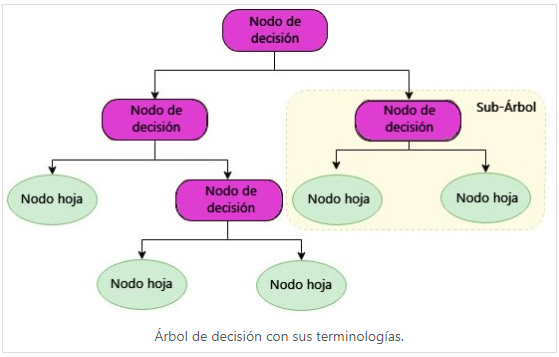

https://sitiobigdata.com/2019/12/14/arbol-de-decision-en-machine-learning-parte-1/#google_vignette

## **1.1 Definición de árboles de decicion**

Un árbol de decisión es una secuencia de condiciones expresada como un digrama de flujo con la estructura de un árbol donde cada nodo interno expresa una evaluación sobre un atributo o caractrística, cada rama expresa el resultado de esta evaluación, cada hoja del nodo (nodo terminal) resulta en una etiqueta de la clase (decición final) que deseamos clasificar en cual es entrenado o ajustado a través de la estructura jerárquica del árbol.

Los árboles de decisión son modelos utilizados en minería de datos que subdividen el espacio de las variables explicativas para generar regiones disjuntas, para que así cada elemento pertenezca únicamente a una misma
región y si dentro de una región existen elementos de distintas clases estas se subdividen formando regiones más pequeñas hasta particionar todo el conjunto de entrada.

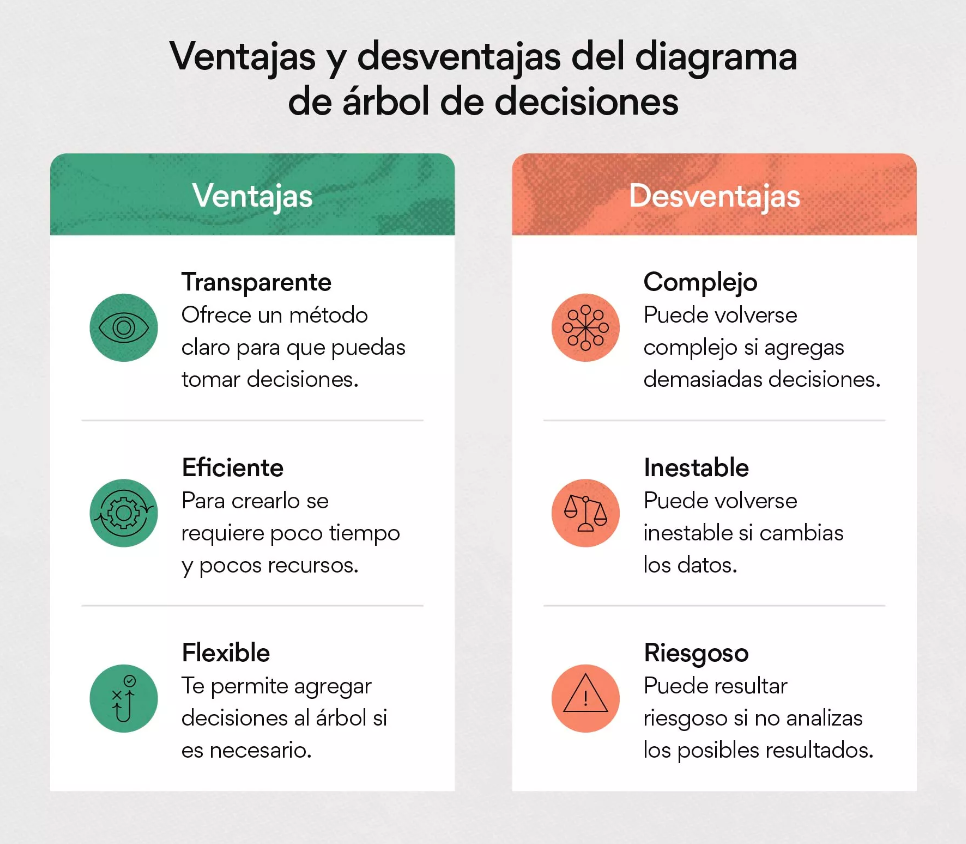

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/main/Regresion/Concrete_Data_Yeh.csv',sep = ';', )
display(df.head())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


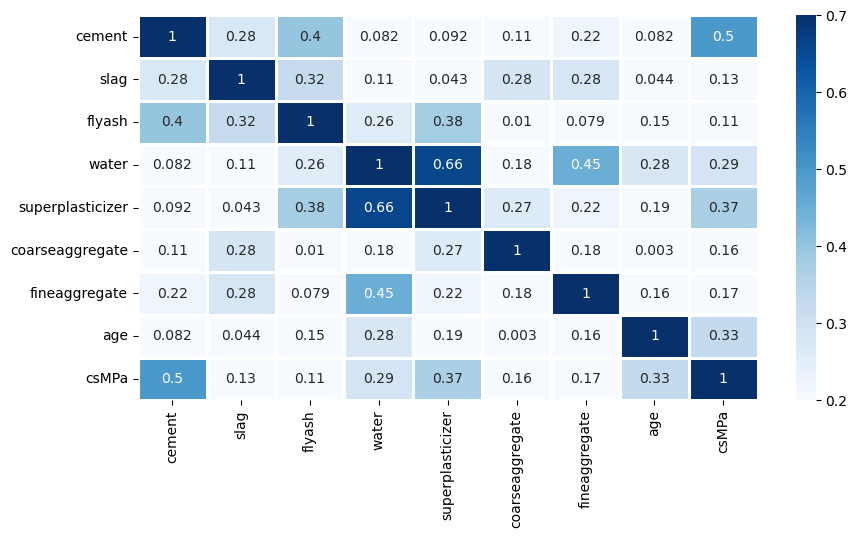

In [4]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr().abs(),annot = True, linewidths =2, vmin =0.2,vmax=0.7,cmap = 'Blues')
plt.show()

In [6]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [8]:
X = df.drop(labels = 'csMPa',axis = 'columns')
y = df['csMPa']
print('Tamaño de características:',X.shape)
print('Tamaño de variable objetivo: ',y.shape)

Tamaño de características: (1030, 8)
Tamaño de variable objetivo:  (1030,)


In [9]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [10]:
from sklearn import tree

In [17]:
model_tree1 = tree.DecisionTreeRegressor(random_state=42)
model_tree1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
diagrama_tree = tree.export_text(model_tree1)
print(diagrama_tree)

|--- feature_7 <= 21.00
|   |--- feature_0 <= 354.50
|   |   |--- feature_7 <= 10.50
|   |   |   |--- feature_0 <= 275.05
|   |   |   |   |--- feature_0 <= 161.90
|   |   |   |   |   |--- feature_7 <= 5.00
|   |   |   |   |   |   |--- feature_1 <= 196.65
|   |   |   |   |   |   |   |--- feature_5 <= 913.10
|   |   |   |   |   |   |   |   |--- feature_0 <= 127.50
|   |   |   |   |   |   |   |   |   |--- value: [4.57]
|   |   |   |   |   |   |   |   |--- feature_0 >  127.50
|   |   |   |   |   |   |   |   |   |--- value: [4.78]
|   |   |   |   |   |   |   |--- feature_5 >  913.10
|   |   |   |   |   |   |   |   |--- feature_6 <= 824.55
|   |   |   |   |   |   |   |   |   |--- value: [3.32]
|   |   |   |   |   |   |   |   |--- feature_6 >  824.55
|   |   |   |   |   |   |   |   |   |--- value: [2.33]
|   |   |   |   |   |   |--- feature_1 >  196.65
|   |   |   |   |   |   |   |--- feature_0 <= 148.30
|   |   |   |   |   |   |   |   |--- value: [8.06]
|   |   |   |   |   |   |   |--- featu

* Calibrando Hiperparámetros

Estos hiperparámetros son fundamentales para controlar la complejidad del árbol de decisión y ayudar a prevenir el sobreajuste. En general, al ajustarlos, se busca un equilibrio entre la capacidad del modelo para capturar patrones en los datos y su capacidad para generalizar a datos no vistos (evitar el sobreajuste). 

1. **Criterion(criterio):**
    * Este parámetro determina la medida utilizada para evaluar la calidad de una division en un nodo.Los dos criterios más comunes son:
        * 'mse'(Mean Squared Error) para arboles de regresión.
        * 'gini' o 'entropy' para arboles de clasificación.'gini' se refiere a la impureza de Gini y 'entropy' a la ganancia de información. El criterio de 'gini' tiende a ser más rapido, mientras que 'entropy' busca crear árboles más balanceados.

2. **Splitter(Divisor).**
    * Este parámetro determina la estrategia utilizada para elegir la división en cada nodo. Puede ser 'best', que   elige la mejor división, o 'random', que elige la mejor división aleatoria entre un subconjunto aleatorio de características.

3. **max_features:**
    * Este hiperparámetro controla la cantidad máxima de características que el modelo considerará al buscar la mejor división. Si no se especifica, se considerarán todas las características en cada división. Si se establece en 'sqrt', se considerará la raíz cuadrada del número total de características, lo que puede ayudar a reducir el sobreajuste.

4. **min_samples_split:**
    * Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Si la cantidad de muestras en un nodo es menor que este valor, el nodo no se dividirá.

5. **min_impurity_decrease:**
    * Este hiperparámetro establece un umbral para la reducción mínima de la impureza requerida para realizar una división. Si la división no produce una reducción en la impureza por encima de este valor, el nodo no se dividirá.
    



In [38]:
model_tree_p = tree.DecisionTreeRegressor(max_depth=5, # Controla la profundidad máxima del árbol
                                          max_leaf_nodes=15, # Este parámetro limita el número máximo de nodos terminales(hojas) en el árbol
                                          min_samples_leaf=10, # Establece el número mínimo de muestras(instancias de datos) que deben estar en una hoja
                                          random_state=42,
                                          )
model_tree_p.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=15, min_samples_leaf=10,
                      random_state=42)

In [39]:
diagrama_tree_p = tree.export_text(model_tree_p)
print(diagrama_tree_p)

|--- feature_7 <= 21.00
|   |--- feature_0 <= 354.50
|   |   |--- feature_7 <= 10.50
|   |   |   |--- value: [15.65]
|   |   |--- feature_7 >  10.50
|   |   |   |--- value: [26.54]
|   |--- feature_0 >  354.50
|   |   |--- feature_1 <= 70.65
|   |   |   |--- value: [30.42]
|   |   |--- feature_1 >  70.65
|   |   |   |--- value: [41.88]
|--- feature_7 >  21.00
|   |--- feature_0 <= 311.45
|   |   |--- feature_0 <= 159.05
|   |   |   |--- feature_1 <= 58.50
|   |   |   |   |--- value: [13.42]
|   |   |   |--- feature_1 >  58.50
|   |   |   |   |--- value: [28.33]
|   |   |--- feature_0 >  159.05
|   |   |   |--- feature_3 <= 175.55
|   |   |   |   |--- feature_1 <= 47.65
|   |   |   |   |   |--- value: [41.06]
|   |   |   |   |--- feature_1 >  47.65
|   |   |   |   |   |--- value: [52.62]
|   |   |   |--- feature_3 >  175.55
|   |   |   |   |--- feature_1 <= 13.00
|   |   |   |   |   |--- value: [29.72]
|   |   |   |   |--- feature_1 >  13.00
|   |   |   |   |   |--- value: [38.98]
|   |

In [40]:
import dtreeviz
viz_model = dtreeviz.model(model_tree_p, X_train,y_train)
v = viz_model.view()
v.show()
v.save("diagrama_p.svg")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [41]:
pred_train = model_tree.predict(X_train)
print('Mean squared error (MSE): ',mean_squared_error(y_train,pred_train))
print('Root mean squared error (RMSE): ',np.sqrt(mean_squared_error(y_train,pred_train)))
print('Valor R-squared de las predicciones: ',round(r2_score(y_train,pred_train),3))

Mean squared error (MSE):  0.8696333940129449
Root mean squared error (RMSE):  0.9325413631646292
Valor R-squared de las predicciones:  0.997


In [42]:
pred_test = model_tree.predict(X_test)
print('Mean squared error (MSE): ',mean_squared_error(y_test,pred_test))
print('Root mean squared error (RMSE): ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('Valor R-squared de las predicciones: ',round(r2_score(y_test,pred_test),3))

Mean squared error (MSE):  42.58102330097088
Root mean squared error (RMSE):  6.525413649798063
Valor R-squared de las predicciones:  0.835


In [43]:
pred_train_p = model_tree_p.predict(X_train)
print('Mean squared error (MSE): ',mean_squared_error(y_train,pred_train_p))
print('Root mean squared error (RMSE): ',np.sqrt(mean_squared_error(y_train,pred_train_p)))
print('Valor R-squared de las predicciones: ',round(r2_score(y_train,pred_train_p),3))

Mean squared error (MSE):  68.8094352609413
Root mean squared error (RMSE):  8.29514528269043
Valor R-squared de las predicciones:  0.758


In [46]:
pred_test_p = model_tree_p.predict(X_test)
print('Mean squared error (MSE): ',mean_squared_error(y_test,pred_test_p))
print('Root mean squared error (RMSE): ',np.sqrt(mean_squared_error(y_test,pred_test_p)))
print('Valor R-squared de las predicciones: ',round(r2_score(y_test,pred_test_p),3))

Mean squared error (MSE):  108.95788210338448
Root mean squared error (RMSE):  10.43828923259863
Valor R-squared de las predicciones:  0.577


In [47]:
# !pip install shap

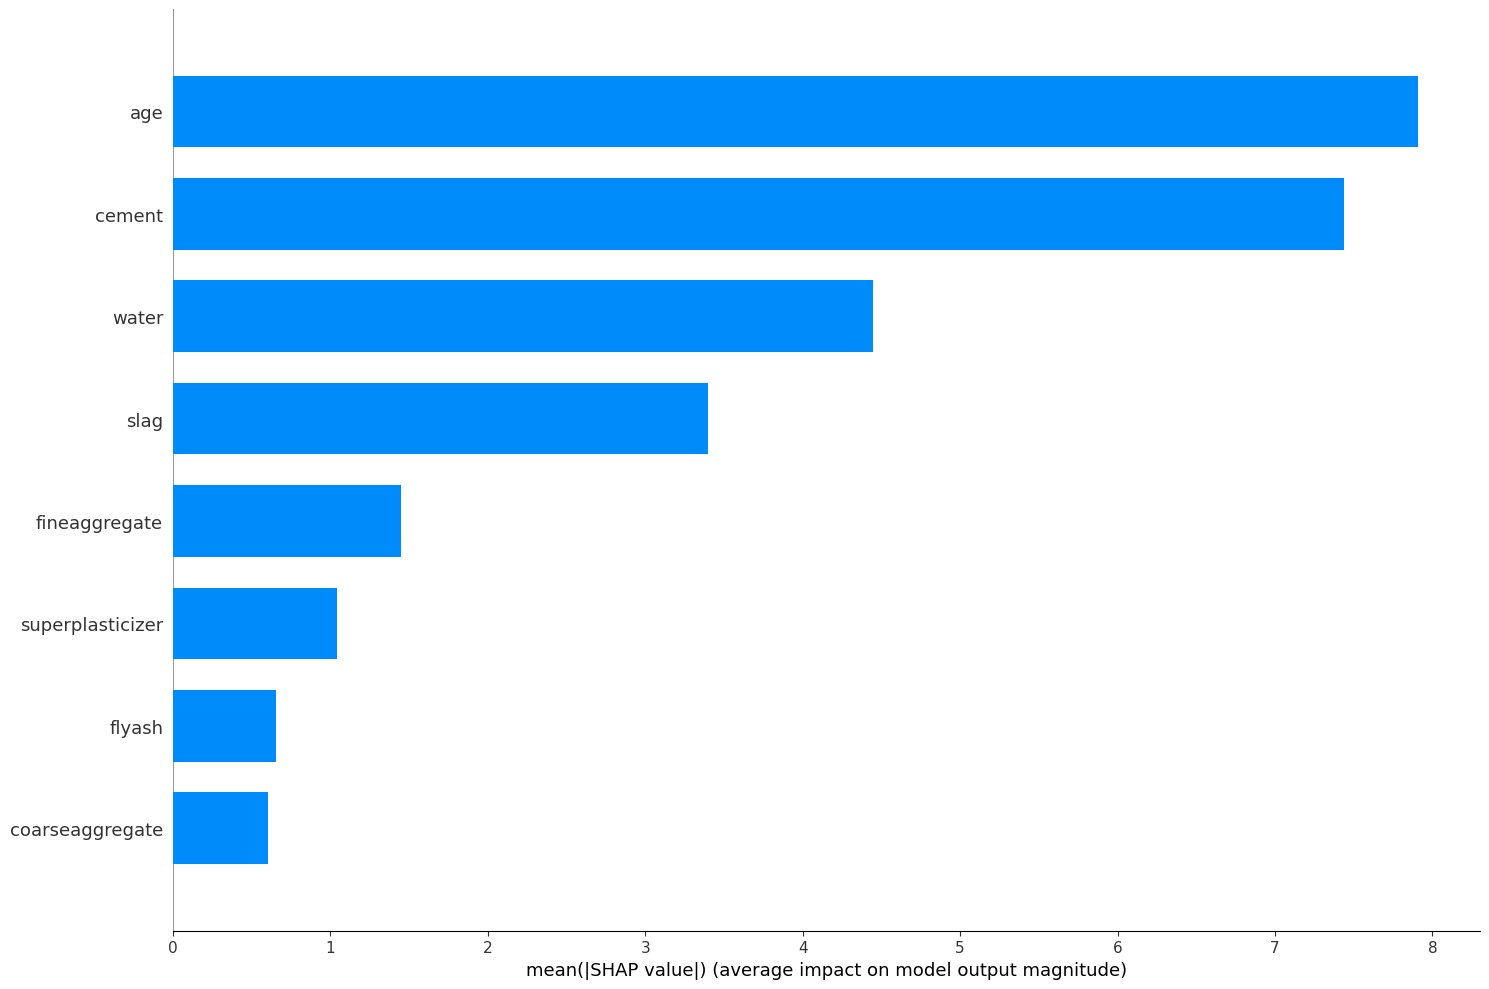

In [49]:
import shap
explainer_km = shap.TreeExplainer(model_tree)
shap_values_km = explainer_km.shap_values(X_train)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))

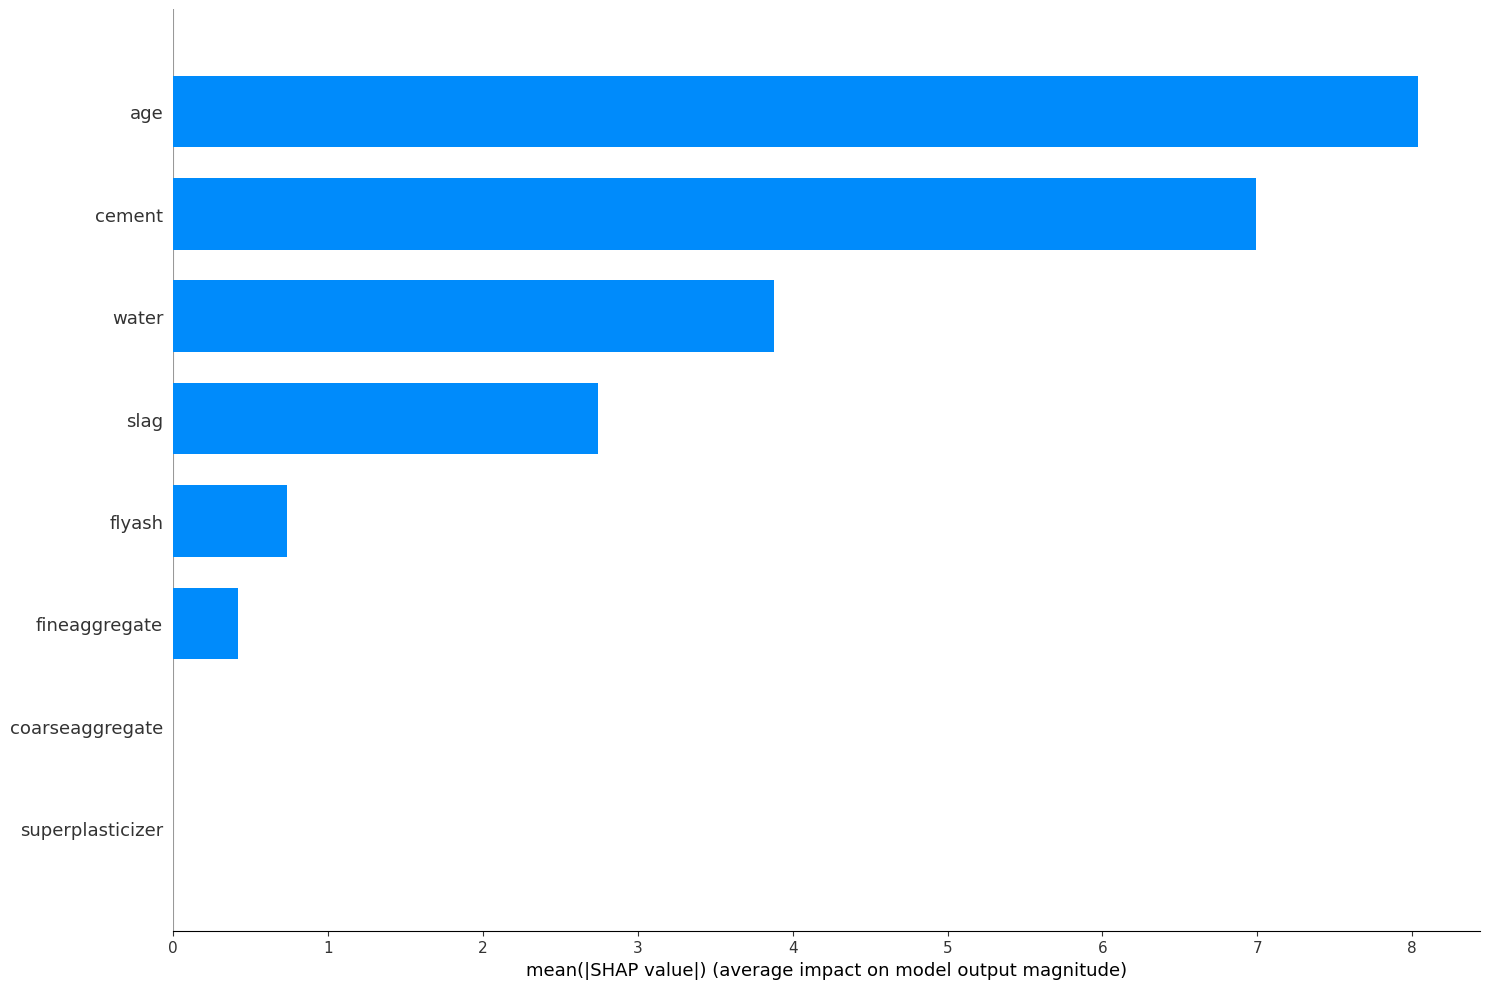

In [50]:
explainer_km = shap.TreeExplainer(model_tree_p)
shap_values_km = explainer_km.shap_values(X_train)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))